In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
import json
import scipy.stats as st

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

591

In [3]:
#Setting up URL to call API.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"
url1 = f"{url}appid={weather_api_key}&units={units}&q="
response = requests.get(url1 + city)
weather = response.json()
print(json.dumps(weather, indent=2))

{
  "coord": {
    "lon": 30.79,
    "lat": 59.7
  },
  "weather": [
    {
      "id": 803,
      "main": "Clouds",
      "description": "broken clouds",
      "icon": "04n"
    }
  ],
  "base": "stations",
  "main": {
    "temp": 40.23,
    "feels_like": 30.79,
    "temp_min": 37.99,
    "temp_max": 42.01,
    "pressure": 1019,
    "humidity": 56
  },
  "visibility": 10000,
  "wind": {
    "speed": 8.95,
    "deg": 270
  },
  "clouds": {
    "all": 62
  },
  "dt": 1587583608,
  "sys": {
    "type": 1,
    "id": 8926,
    "country": "RU",
    "sunrise": 1587521999,
    "sunset": 1587576614
  },
  "timezone": 10800,
  "id": 546105,
  "name": "Nikolskoye",
  "cod": 200
}


In [4]:
print(requests.get(url1+city))

<Response [200]>


In [5]:
#Calling the data and storing it in our lists.
name = []
country = []
date = []
lat =[]
long = []
temp = []
humidity = []
clouds = []
wind = []
tracker = 1
print("Retreiving...")
print("---------------------------")
for city in cities:
    try:
        response = requests.get(url1 + city).json()
        name.append(response["name"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        lat.append(response["coord"]["lat"])
        long.append(response["coord"]["lon"])
        temp.append(response["main"]["temp_max"])
        humidity.append(response["main"]["humidity"])
        clouds.append(response["clouds"]["all"])
        wind.append(response["wind"]["speed"])
        record = response["name"]
        print(f"City Retreived - Name: {record}")
        tracker +=1
    except:
            print("No Data Available --> Next City")
    continue
print("---------------------------")
print("Complete.")
print("---------------------------")

Retreiving...
---------------------------
City Retreived - Name: Bluff
City Retreived - Name: Constitución
City Retreived - Name: Kavieng
City Retreived - Name: Albany
City Retreived - Name: Dingle
City Retreived - Name: Dikson
City Retreived - Name: Hobart
City Retreived - Name: Rikitea
City Retreived - Name: Khatanga
City Retreived - Name: Inhambane
City Retreived - Name: Charyshskoye
City Retreived - Name: Ushuaia
City Retreived - Name: Tres Arroyos
City Retreived - Name: Złocieniec
City Retreived - Name: Salcedo
City Retreived - Name: Cockburn Town
City Retreived - Name: Anadyr
No Data Available --> Next City
No Data Available --> Next City
City Retreived - Name: George Town
City Retreived - Name: Dehui
City Retreived - Name: Hithadhoo
City Retreived - Name: Jamestown
City Retreived - Name: Dāmghān
City Retreived - Name: Kpandu
City Retreived - Name: Saint Paul Harbor
City Retreived - Name: Lebu
City Retreived - Name: Atuona
No Data Available --> Next City
City Retreived - Name: Ca

City Retreived - Name: Tura
City Retreived - Name: Havøysund
City Retreived - Name: Saint-Philippe
City Retreived - Name: Guatire
No Data Available --> Next City
City Retreived - Name: Kenai
City Retreived - Name: Río Gallegos
City Retreived - Name: Mount Gambier
City Retreived - Name: Aknīste
City Retreived - Name: Paraíso
City Retreived - Name: Majene
No Data Available --> Next City
City Retreived - Name: Jijiga
City Retreived - Name: La Seyne-sur-Mer
City Retreived - Name: Pospelikha
City Retreived - Name: Griffith
City Retreived - Name: Carballo
City Retreived - Name: Jiayuguan City
City Retreived - Name: Rūdbār
City Retreived - Name: São Miguel do Araguaia
City Retreived - Name: Burns Lake
City Retreived - Name: Saint George
City Retreived - Name: Kununurra
City Retreived - Name: Kitui
City Retreived - Name: Karasjok
City Retreived - Name: Batemans Bay
City Retreived - Name: Acapulco de Juárez
City Retreived - Name: Norden
City Retreived - Name: Slave Lake
City Retreived - Name: Z

City Retreived - Name: Alice
City Retreived - Name: Buala
City Retreived - Name: Balkanabat
City Retreived - Name: Quang Ngai
City Retreived - Name: Kumo
No Data Available --> Next City
City Retreived - Name: São João da Barra
City Retreived - Name: Port Lincoln
City Retreived - Name: Port Macquarie
City Retreived - Name: Harar
City Retreived - Name: Newport
City Retreived - Name: Mount Darwin
City Retreived - Name: Cananéia
City Retreived - Name: Rockport
City Retreived - Name: Kasempa
City Retreived - Name: Nanortalik
No Data Available --> Next City
City Retreived - Name: Ozernovskiy
City Retreived - Name: Bhāgalpur
No Data Available --> Next City
City Retreived - Name: Cabedelo
City Retreived - Name: Monrovia
City Retreived - Name: Montrose
City Retreived - Name: Nanchang
City Retreived - Name: Pozo Colorado
City Retreived - Name: Shitanjing
City Retreived - Name: Dauphin
City Retreived - Name: Camaná
City Retreived - Name: Dabou
City Retreived - Name: Suntar
City Retreived - Name: 

In [6]:
#Creating a dataframe and saving it as a .csv file.
core0 = {"City": name, "Country": country, "Date": date, "Latitude": lat, "Longitude": long,
         "Maximum Temperature": temp, "Humidity": humidity, "Cloud Level": clouds, "Wind (m/h)": wind}
core0 = pd.DataFrame(core0)
core0.head()

,City,Country,Date,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Level,Wind (m/h)
0,Bluff,NZ,1587583609,-46.60,168.33,48.99,85,82,1.99
1,Constitución,CL,1587583322,-35.33,-72.42,67.77,44,82,6.96
2,Kavieng,PG,1587583384,-2.57,150.80,81.25,76,100,0.72
3,Albany,US,1587583592,42.60,-73.97,45.00,28,75,34.45
4,Dingle,PH,1587583609,11.00,122.67,80.31,81,78,8.43


In [7]:
core0.to_csv("../output_data/weather_metadata.csv")

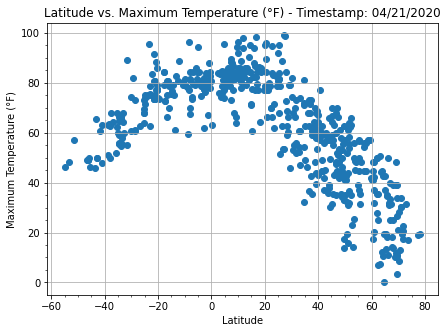

In [28]:
#Plotting the Data
#Latitude vs. Temperature
plt.figure(figsize=(7,5))
plt.scatter(core0["Latitude"],core0["Maximum Temperature"])
plt.title("Latitude vs. Maximum Temperature (°F) - Timestamp: 04/21/2020")
plt.minorticks_on()
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")
plt.savefig("../output_data/latitude-vs-temp.png")
plt.show()

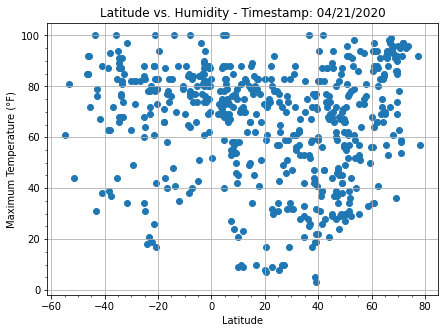

In [24]:
#Latitude vs. Humidity
plt.figure(figsize=(7,5))
plt.scatter(core0["Latitude"],core0["Humidity"])
plt.title("Latitude vs. Humidity - Timestamp: 04/21/2020")
plt.minorticks_on()
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")
plt.savefig("../output_data/latitude-vs-humidity.png")
plt.show()

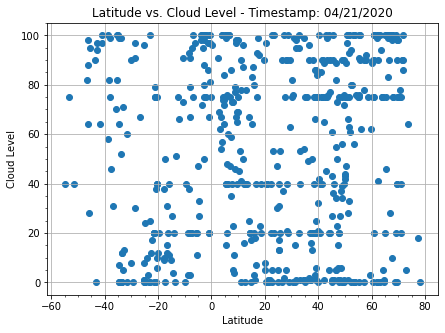

In [26]:
#Latitude vs. Cloud Level
plt.figure(figsize=(7,5))
plt.scatter(core0["Latitude"],core0["Cloud Level"])
plt.title("Latitude vs. Cloud Level - Timestamp: 04/21/2020")
plt.minorticks_on()
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Cloud Level")
plt.savefig("../output_data/latitude-vs-cloudlvl.png")
plt.show()

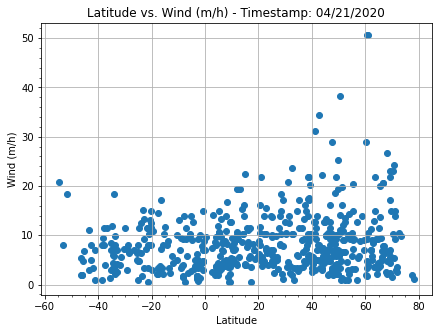

In [27]:
#Latitude vs. Wind Speed
plt.figure(figsize=(7,5))
plt.scatter(core0["Latitude"],core0["Wind (m/h)"])
plt.title("Latitude vs. Wind (m/h) - Timestamp: 04/21/2020")
plt.minorticks_on()
plt.grid(True)
plt.xlabel("Latitude")
plt.ylabel("Wind (m/h)")
plt.savefig("../output_data/latitude-vs-wind.png")
plt.show()

In [12]:
#Linear Regressions
#Northern & Southern Hemisphere DataFrames
#https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.to_numeric.html
north = core0.loc[pd.to_numeric(core0["Latitude"]).astype(float) > 0,:]
south = core0.loc[pd.to_numeric(core0["Latitude"]).astype(float) < 0,:]

In [13]:
north.head()

,City,Country,Date,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Level,Wind (m/h)
3,Albany,US,1587583592,42.60,-73.97,45.00,28,75,34.45
4,Dingle,PH,1587583609,11.00,122.67,80.31,81,78,8.43
5,Dikson,RU,1587583609,73.51,80.55,16.88,96,64,9.91
8,Khatanga,RU,1587583609,71.97,102.50,20.53,97,90,2.55
10,Charyshskoye,RU,1587583610,51.40,83.56,55.63,34,75,6.58


In [14]:
south.head()

,City,Country,Date,Latitude,Longitude,Maximum Temperature,Humidity,Cloud Level,Wind (m/h)
0,Bluff,NZ,1587583609,-46.60,168.33,48.99,85,82,1.99
1,Constitución,CL,1587583322,-35.33,-72.42,67.77,44,82,6.96
2,Kavieng,PG,1587583384,-2.57,150.80,81.25,76,100,0.72
6,Hobart,AU,1587583609,-42.88,147.33,50.00,76,94,8.05
7,Rikitea,PF,1587583609,-23.12,-134.97,75.40,78,100,15.17


The regression shows a negative correlation,-0.8546639572237013, as evidenced by the drop in temperature in the Northern Hemisphere as we move away from the equator


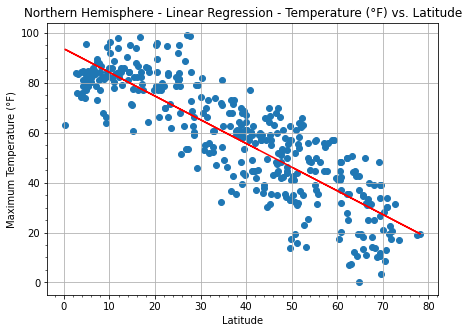

In [15]:
#Northern Hemisphere - Temperature (°F) vs. Latitude
x0 = north["Latitude"]
y0 = north["Maximum Temperature"]
slope0, intercept0, r_value0, p_value0, std_err0 = st.linregress(x0,y0)
regression0 = x0*slope0 + intercept0
equation0 = "y = " + str(slope0) + str(intercept0)
plt.figure(figsize=(7,5))
plt.scatter(x0,y0)
plt.plot(x0,regression0,"r-")
plt.minorticks_on()
plt.grid(True)
plt.title("Northern Hemisphere - Linear Regression - Temperature (°F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")
print(f"The regression shows a negative correlation,{r_value0}, as evidenced by the drop in temperature in the Northern Hemisphere as we move away from the equator")

The regression shows a positive correlation,0.7682033972726298, as evidenced by the increase in temperature in the Southern Hemisphere as we move towards the equator


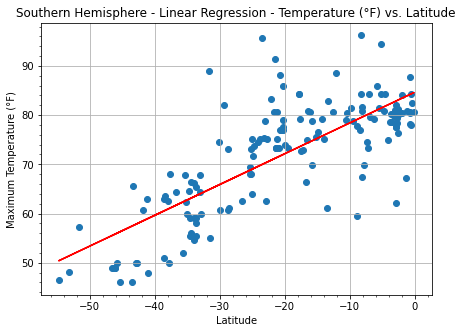

In [16]:
#Southern Hemisphere - Temperature (°F) vs. Latitude
x1 = south["Latitude"]
y1 = south["Maximum Temperature"]
slope1, intercept1, r_value1, p_value1, std_err1 = st.linregress(x1,y1)
regression1 = x1*slope1 + intercept1
equation1 = "y = " + str(slope1) + str(intercept1)
plt.figure(figsize=(7,5))
plt.scatter(x1,y1)
plt.plot(x1,regression1,"r-")
plt.minorticks_on()
plt.grid(True)
plt.title("Southern Hemisphere - Linear Regression - Temperature (°F) vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Maximum Temperature (°F)")
print(f"The regression shows a positive correlation,{r_value1}, as evidenced by the increase in temperature in the Southern Hemisphere as we move towards the equator")

The regression shows no clear and/or insignificant correlation, 0.16868407076390246,between the level of humidity and the latitude in the Northern Hemisphere.


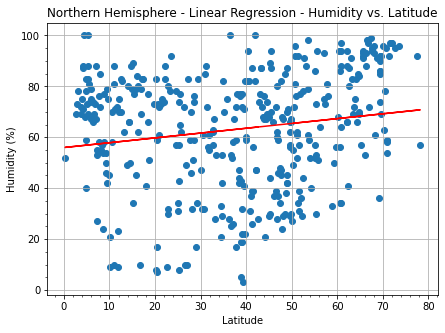

In [17]:
#Northern Hemisphere - Humidity vs. Latitude
x2 = north["Latitude"]
y2 = north["Humidity"]
slope2, intercept2, r_value2, p_value2, std_err2 = st.linregress(x2,y2)
regression2 = x2*slope2 + intercept2
equation2 = "y = " + str(slope2) + str(intercept2)
plt.figure(figsize=(7,5))
plt.scatter(x2,y2)
plt.plot(x2,regression2,"r-")
plt.minorticks_on()
plt.grid(True)
plt.title("Northern Hemisphere - Linear Regression - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The regression shows no clear and/or insignificant correlation, {r_value2},between the level of humidity and the latitude in the Northern Hemisphere.")

The regression shows no clear and/or insignificant correlation, 0.07125628258552016,between the level of humidity and the latitude in the Southern Hemisphere.


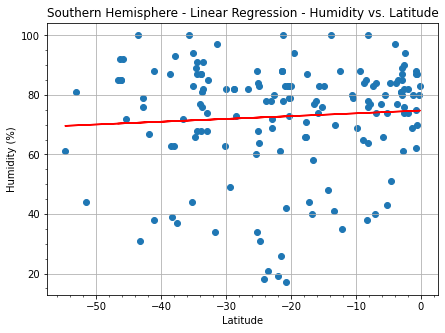

In [18]:
#Southern Hemisphere - Humidity vs. Latitude
x3 = south["Latitude"]
y3 = south["Humidity"]
slope3, intercept3, r_value3, p_value3, std_err3 = st.linregress(x3,y3)
regression3 = x3*slope3 + intercept3
equation3 = "y = " + str(slope3) + str(intercept3)
plt.figure(figsize=(7,5))
plt.scatter(x3,y3)
plt.plot(x3,regression3,"r-")
plt.minorticks_on()
plt.grid(True)
plt.title("Southern Hemisphere - Linear Regression - Humidity vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
print(f"The regression shows no clear and/or insignificant correlation, {r_value3},between the level of humidity and the latitude in the Southern Hemisphere.")

The regression shows no clear and/or insignificant correlation, 0.07911966259423528,between the cloud level and the latitude in the Northern Hemisphere.


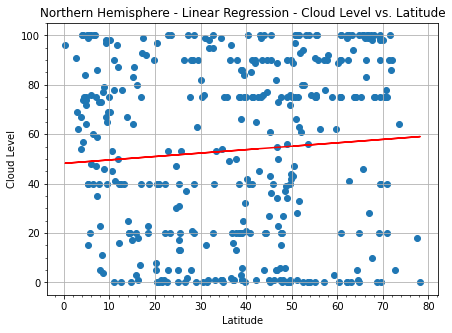

In [19]:
#Northern Hemisphere - Cloud Level vs. Latitude
x4 = north["Latitude"]
y4 = north["Cloud Level"]
slope4, intercept4, r_value4, p_value4, std_err4 = st.linregress(x4,y4)
regression4 = x4*slope4 + intercept4
equation4 = "y = " + str(slope4) + str(intercept4)
plt.figure(figsize=(7,5))
plt.scatter(x4,y4)
plt.plot(x4,regression4,"r-")
plt.minorticks_on()
plt.grid(True)
plt.title("Northern Hemisphere - Linear Regression - Cloud Level vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloud Level")
print(f"The regression shows no clear and/or insignificant correlation, {r_value4},between the cloud level and the latitude in the Northern Hemisphere.")

The regression shows no clear and/or insignificant correlation, 0.10754291729327049,between the cloud level and the latitude in the Southern Hemisphere.


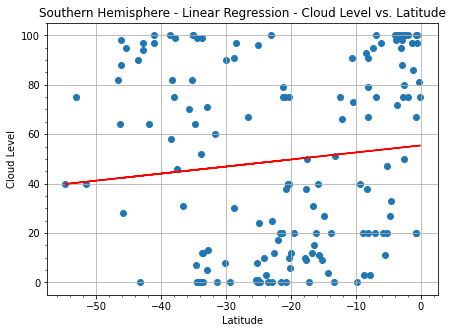

In [20]:
#Southern Hemisphere - Cloud Level vs. Latitude
x5 = south["Latitude"]
y5 = south["Cloud Level"]
slope5, intercept5, r_value5, p_value5, std_err5 = st.linregress(x5,y5)
regression5 = x5*slope5 + intercept5
equation5 = "y = " + str(slope5) + str(intercept4)
plt.figure(figsize=(7,5))
plt.scatter(x5,y5)
plt.plot(x5,regression5,"r-")
plt.minorticks_on()
plt.grid(True)
plt.title("Southern Hemisphere - Linear Regression - Cloud Level vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Cloud Level")
print(f"The regression shows no clear and/or insignificant correlation, {r_value5},between the cloud level and the latitude in the Southern Hemisphere.")

The regression shows no clear and/or insignificant correlation, 0.1146252729285018,between the wind level and the latitude in the Northern Hemisphere.


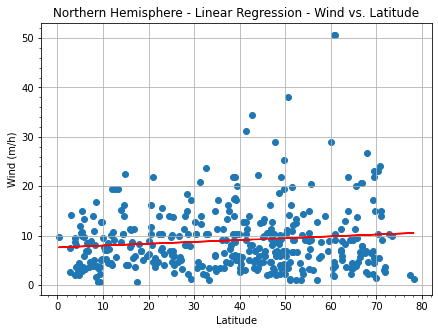

In [21]:
#Northern Hemisphere - Wind vs. Latitude
x6 = north["Latitude"]
y6 = north["Wind (m/h)"]
slope6, intercept6, r_value6, p_value6, std_err6 = st.linregress(x6,y6)
regression6 = x6*slope6 + intercept6
equation6 = "y = " + str(slope6) + str(intercept6)
plt.figure(figsize=(7,5))
plt.scatter(x6,y6)
plt.plot(x6,regression6,"r-")
plt.minorticks_on()
plt.grid(True)
plt.title("Northern Hemisphere - Linear Regression - Wind vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind (m/h)")
print(f"The regression shows no clear and/or insignificant correlation, {r_value6},between the wind level and the latitude in the Northern Hemisphere.")

The regression shows no clear and/or insignificant correlation, -0.11280540963339054,between the wind level and the latitude in the Southern Hemisphere.


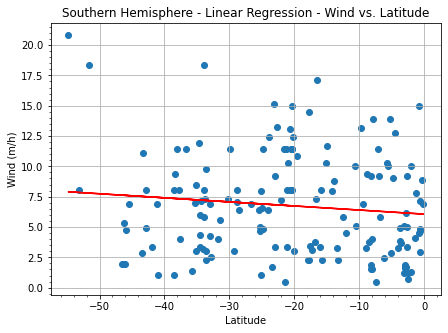

In [22]:
#Southern Hemisphere - Wind vs. Latitude
x7 = south["Latitude"]
y7 = south["Wind (m/h)"]
slope7, intercept7, r_value7, p_value7, std_err7 = st.linregress(x7,y7)
regression7 = x7*slope7 + intercept7
equation7 = "y = " + str(slope7) + str(intercept7)
plt.figure(figsize=(7,5))
plt.scatter(x7,y7)
plt.plot(x7,regression7,"r-")
plt.minorticks_on()
plt.grid(True)
plt.title("Southern Hemisphere - Linear Regression - Wind vs. Latitude")
plt.xlabel("Latitude")
plt.ylabel("Wind (m/h)")
print(f"The regression shows no clear and/or insignificant correlation, {r_value7},between the wind level and the latitude in the Southern Hemisphere.")